In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("housing_price_dataset.csv")


In [ ]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [ ]:
df.Neighborhood.value_counts()

Suburb    16721
Rural     16676
Urban     16603
Name: Neighborhood, dtype: int64

In [ ]:
df.YearBuilt.value_counts()

1968    777
1977    742
1983    741
1967    729
1999    728
       ... 
1950    643
2016    642
2006    640
2012    638
2001    621
Name: YearBuilt, Length: 72, dtype: int64

In [ ]:
# Outlier
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Column: Price')

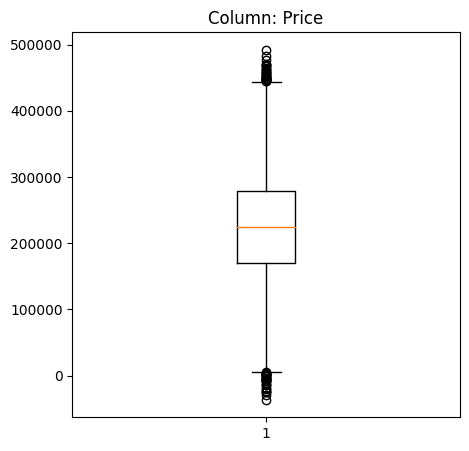

In [ ]:
plt.figure(figsize = (5,5))
plt.boxplot(df.Price)
plt.title('Column: Price')

In [ ]:
Neighborhood = {"Suburb" : 0, "Rural" : 1, "Urban" : 2}

df["Neighborhood"] = df["Neighborhood"].map(Neighborhood)

In [ ]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,1,1969,215355.283618
1,2459,3,2,1,1980,195014.221626
2,1860,2,1,0,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,0,2001,272436.239065


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='SquareFeet', ylabel='Price'>

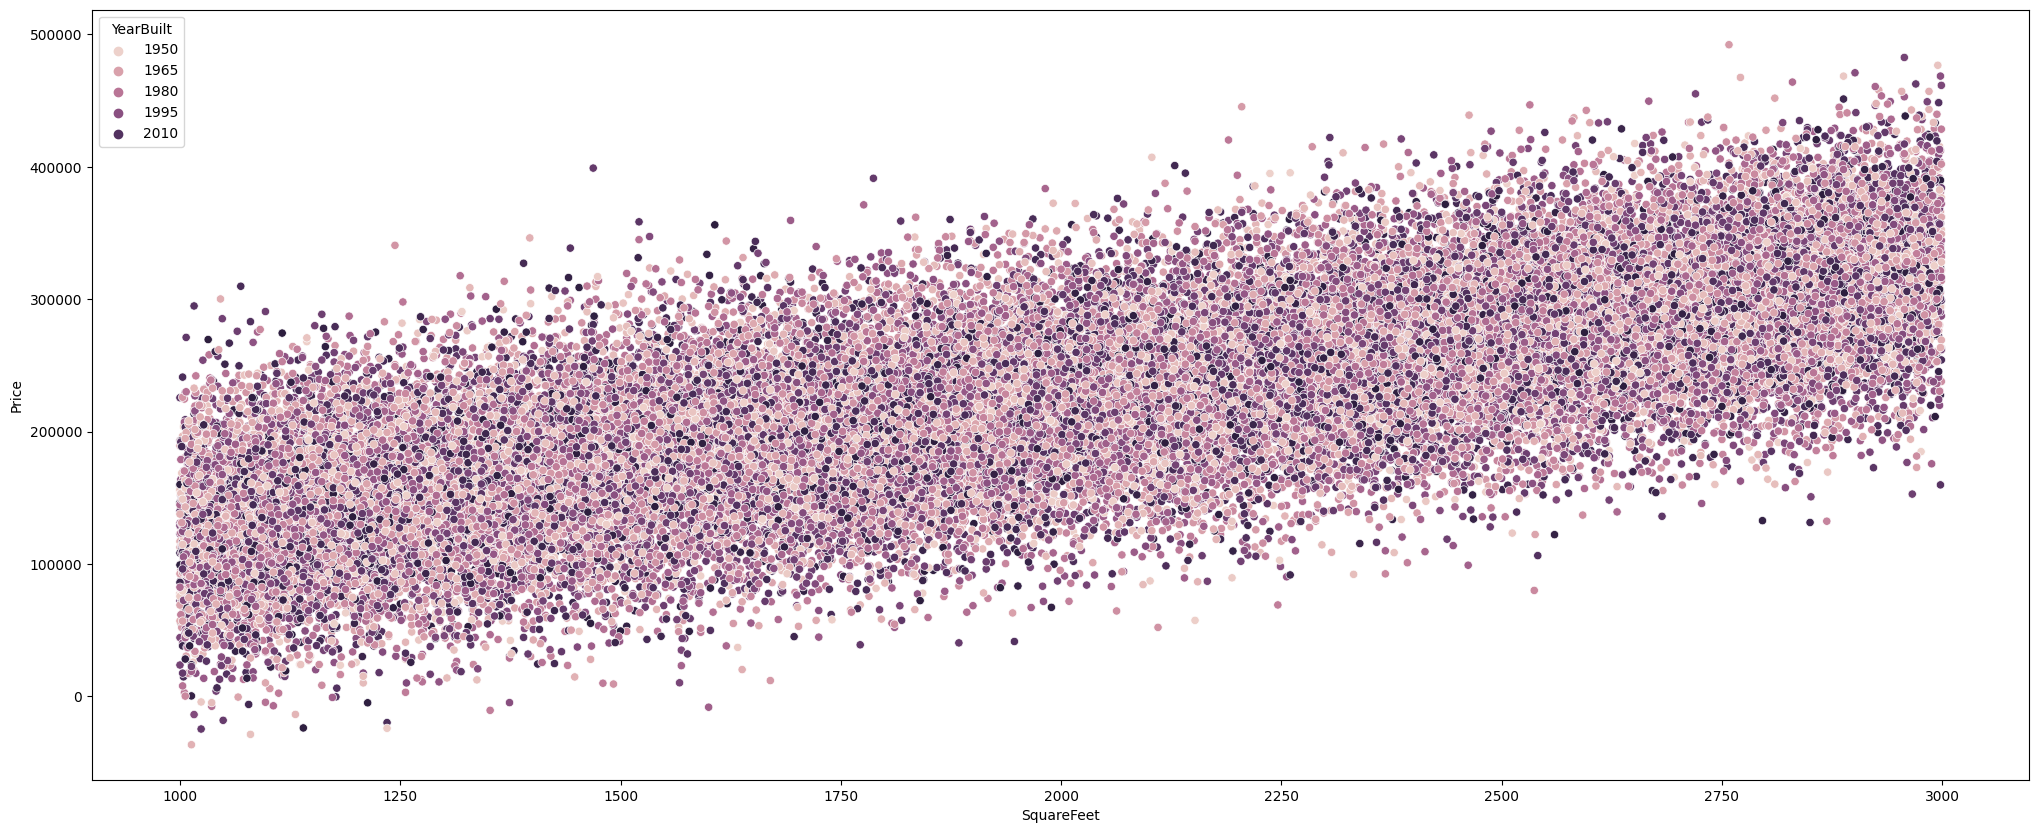

In [ ]:
plt.figure(figsize = (25,10))
sns.scatterplot(data = df, x = 'SquareFeet', y = 'Price', hue = 'YearBuilt')

<Axes: >

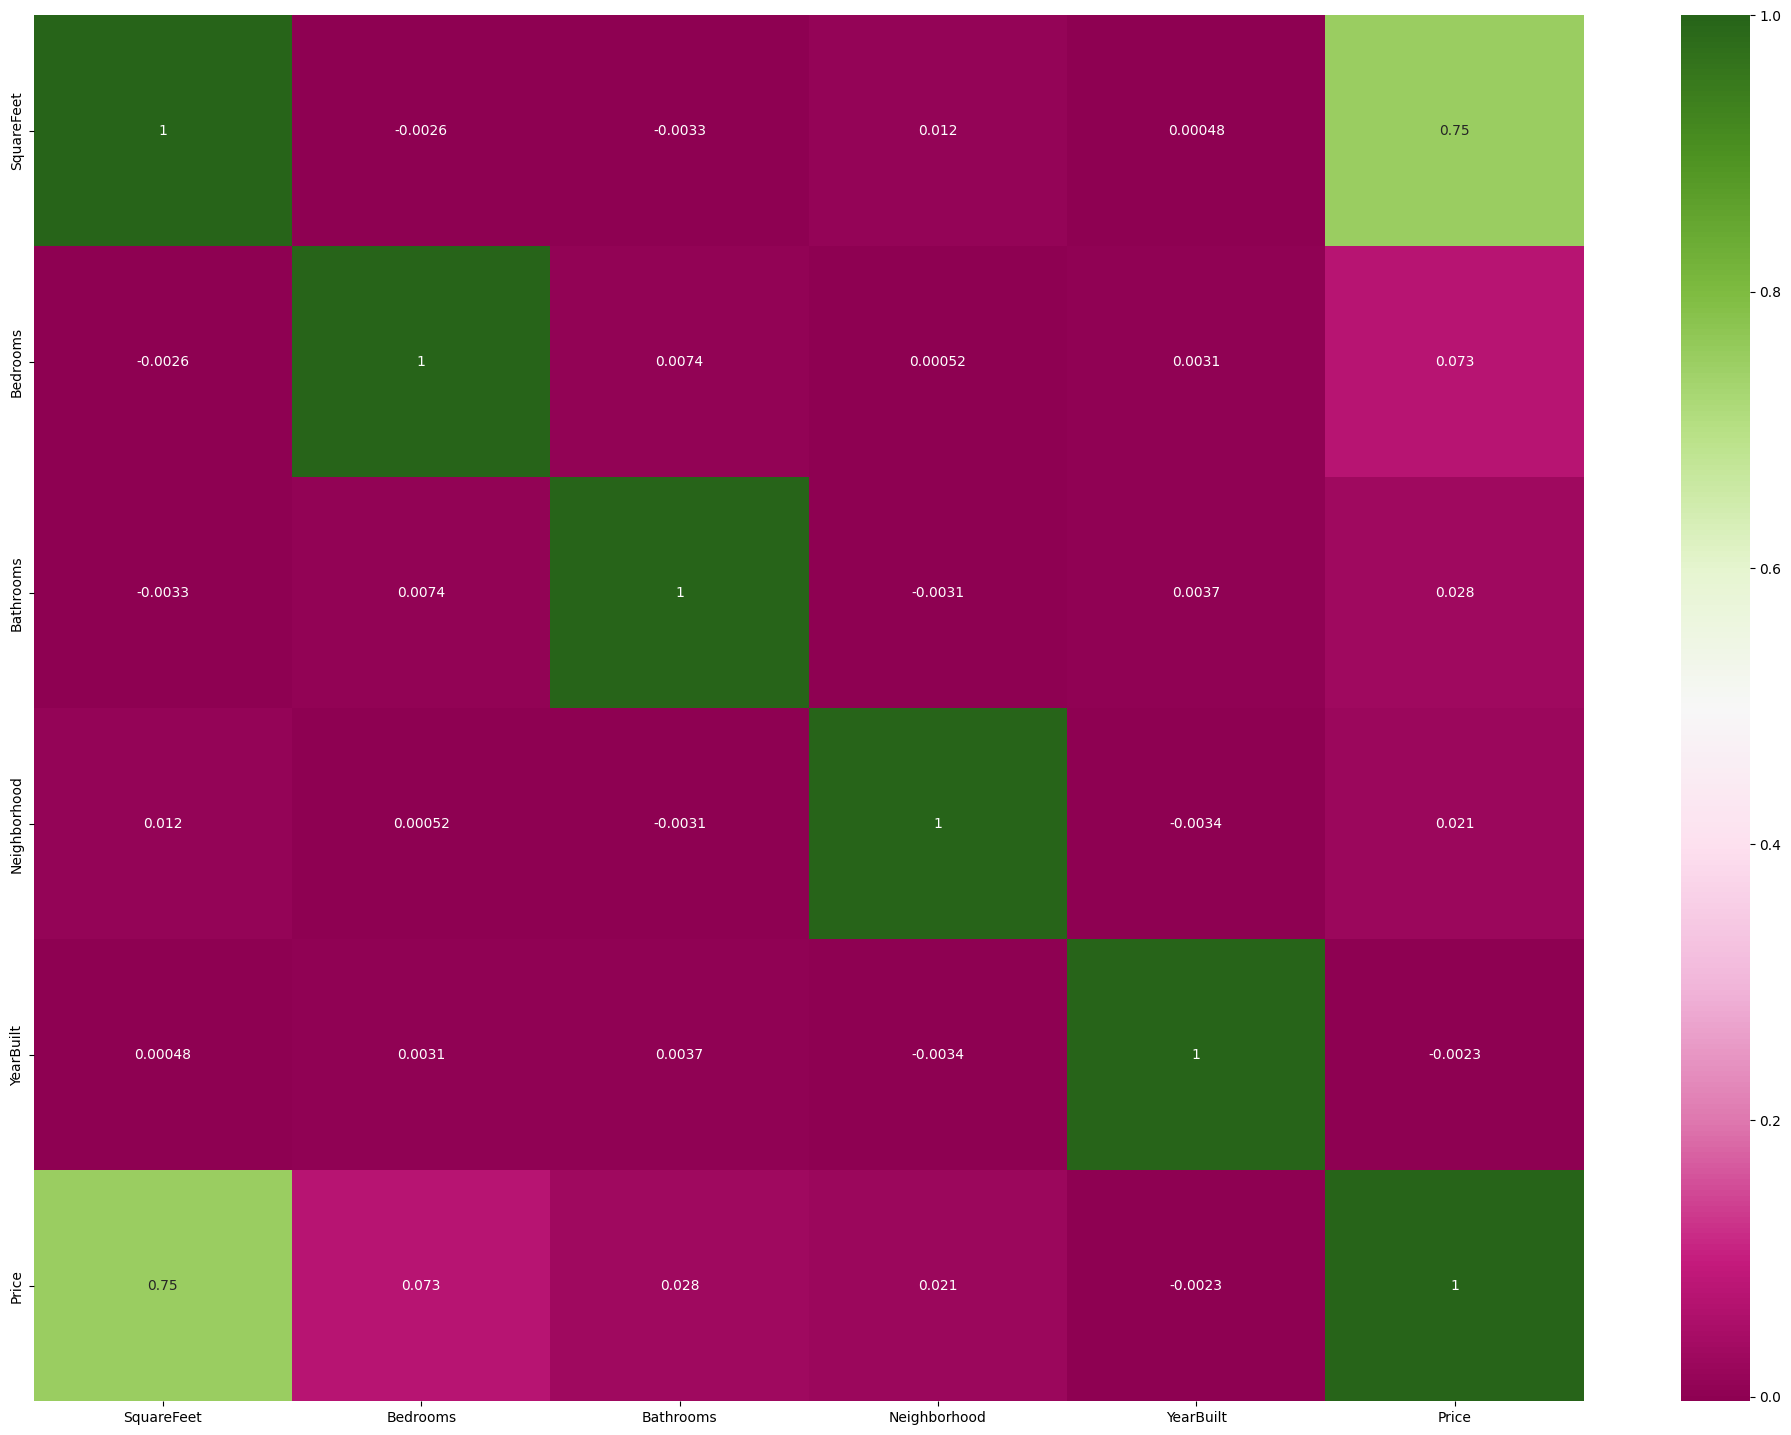

In [ ]:
plt.figure(figsize = (25,18))
sns.heatmap(df.corr(), annot = True, cmap = "PiYG")

In [ ]:
# Mengetahui umur bangunannya

df['Building Age'] = 2023 - df['YearBuilt']

df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Building Age
0,2126,4,1,1,1969,215355.283618,54
1,2459,3,2,1,1980,195014.221626,43
2,1860,2,1,0,1970,306891.012076,53
3,2294,2,1,2,1996,206786.787153,27
4,2130,5,2,0,2001,272436.239065,22


<Axes: xlabel='Building Age', ylabel='Price'>

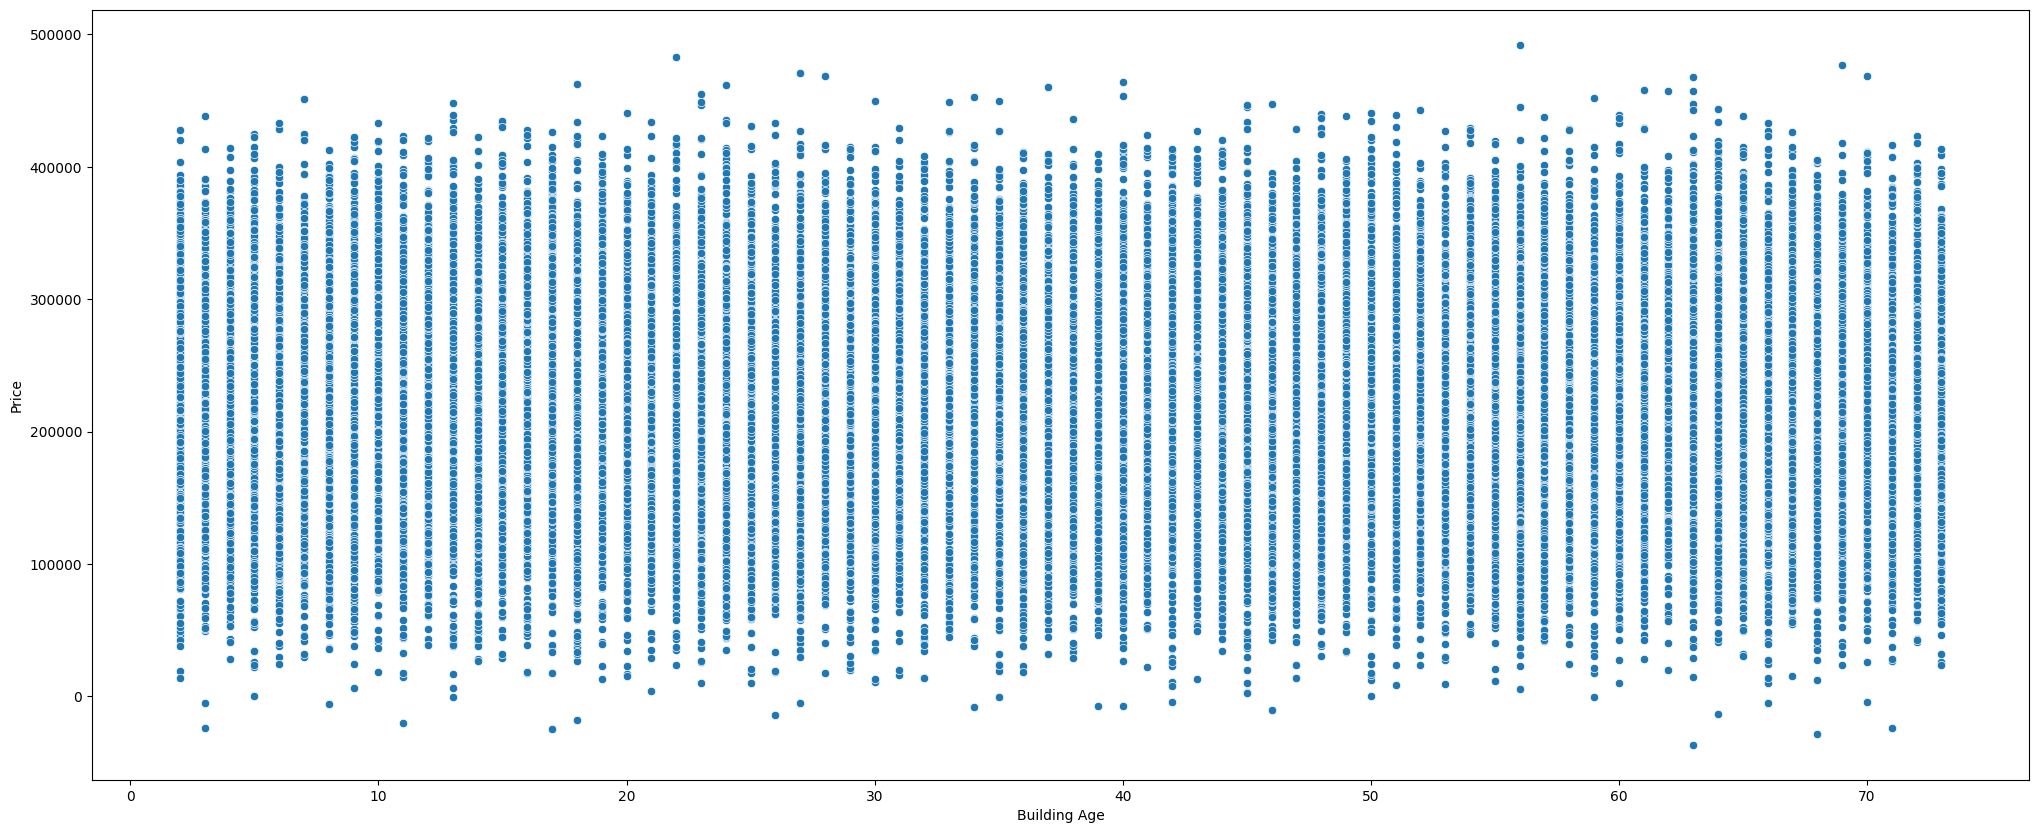

In [ ]:
plt.figure(figsize = (25,10))
sns.scatterplot(data = df, x = "Building Age", y = "Price")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
X = df.drop(columns=['SquareFeet', 'Neighborhood', 'YearBuilt'], axis=1)
y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(40000, 3)

In [ ]:
y_train.shape

(40000,)

In [ ]:
X_test.shape

(10000, 3)

In [ ]:
y_test.shape

(10000,)

**Model**

In [ ]:
model =  KNeighborsRegressor(n_neighbors = 5)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) # squared If True returns MSE value, if False returns RMSE value.


print(f'R2_score: {r2}, \nRMSE: {rmse}')


R2_score: 0.9999998646966591, 
RMSE: 776.6348660907969


In [ ]:
sc = StandardScaler()

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2_score: {r2}, \nRMSE: {rmse}')

R2_score: 0.999999820411133, 
RMSE: 32.10656818988914


In [ ]:
model = RandomForestRegressor()

model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R2_score: {r2}, \nRMSE: {rmse}')

R2_score: 0.9999997886516693, 
RMSE: 34.830009500324536
